# Analysis

### Setup

In [1]:
import json
import pandas as pd
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt
from src import analyse_data
from src import analyse_results

## Initial test runs

### CIDER parameters for input data

More on CIDER from Pappu Lab:
- [CIDER](http://pappulab.wustl.edu/CIDER/about/)
- [localCIDER](http://pappulab.github.io/localCIDER/)

In [6]:
# Loading metadata
metadata_path = 'exp/initial/initial.json'
with open(metadata_path, 'r') as file:
    metadata = json.load(file)

# Calculating parameters
params = pd.concat([analyse_data.cider_parameters(cols['sequence'], name) for name, cols in metadata['data'].items()])

# Presenting documentation and results
params.sort_values(by='kappa')

,kappa,FCR,NCPR,Hydrophobicity,Frac. dis. prom.
H1-0_WT,0.154432,0.432432,0.378378,3.249550,0.891892
H1-0_RAND,0.184133,0.432432,0.378378,3.249550,0.891892
H2B_RAND,0.253122,0.485714,0.371429,2.614286,0.942857
H2B_WT,0.301676,0.485714,0.371429,2.614286,0.942857
H2B_CLUST,0.965685,0.485714,0.371429,2.614286,0.942857
H1-0_CLUST,0.994959,0.432432,0.378378,3.249550,0.891892


### $R_g$-distribution of variants

In [64]:
metadata_path = 'exp/initial/initial.json'
results_dir = 'exp/initial/results'

In [65]:
# Loading data metadata for simulation analysis
with open(metadata_path, 'r') as file:
    data = json.load(file)['data']
data = pd.DataFrame(data).transpose()
data

,template,name,species,sequence,region,location,variant
H1-0_WT,H1-0,histone H1.0,Homo sapiens (human),TKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKA...,CTD,[83:194],Wild type
H1-0_RAND,H1-0,histone H1.0,Homo sapiens (human),VADSKKTSAKAKKKKAKPAKRKAPTGKKPSSTAKKKKAPKKKAKLK...,CTD,[83:194],Randomly shuffled
H1-0_CLUST,H1-0,histone H1.0,Homo sapiens (human),KKKRKKKKKKKKKKKKKKKKKRKKKKKKKKKKKKKKKKKKKKKKKA...,CTD,[83:194],Terminally clustered charges
H2B_WT,H2B,histone H2B type 2-E,Homo sapiens (human),MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRK,NTD,[0:35],Wild type
H2B_RAND,H2B,histone H2B type 2-E,Homo sapiens (human),PPKKRPKSAEVDSPKKSAMAKAKAKGKGTQKKKRR,NTD,[0:35],Randomly shuffled
H2B_CLUST,H2B,histone H2B type 2-E,Homo sapiens (human),KRKRKKKKKKKKRKKAPAVTGAQAMPGASPSPSDE,NTD,[0:35],Terminally clustered charges


In [67]:
# Loading trajectories
trajectories = data.apply(lambda row: md.load_dcd(*['/'.join([results_dir, row.name, filename]) for filename  in ['traj.dcd', 'top.pdb']]), axis=1)

# Calculating simulation specs
data['time'] = [traj.time[-1]*1e-6 for traj in trajectories]

# Calculating Rg
residues = pd.read_csv('src/sim/residues.csv', index_col=1)
masses = data.apply(lambda row: np.tile(list(map(lambda r: residues.loc[r]['MW'], row['sequence'])), (trajectories[row.name].n_frames, 1)), axis=1)
data['Rg'] = [md.compute_rg(traj, m) for traj, m in zip(trajectories, masses)]

data

,template,name,species,sequence,region,location,variant,time,Rg
H1-0_WT,H1-0,histone H1.0,Homo sapiens (human),TKGVGASGSFRLAKSDEPKKSVAFKKTKKEIKKVATPKKASKPKKA...,CTD,[83:194],Wild type,0.200999,"[0.011331619690030445, 0.010947124524072574, 0..."
H1-0_RAND,H1-0,histone H1.0,Homo sapiens (human),VADSKKTSAKAKKKKAKPAKRKAPTGKKPSSTAKKKKAPKKKAKLK...,CTD,[83:194],Randomly shuffled,0.200999,"[0.00837550244271668, 0.0087974503480877, 0.00..."
H1-0_CLUST,H1-0,histone H1.0,Homo sapiens (human),KKKRKKKKKKKKKKKKKKKKKRKKKKKKKKKKKKKKKKKKKKKKKA...,CTD,[83:194],Terminally clustered charges,0.200999,"[0.005133581135404606, 0.005541411629089427, 0..."
H2B_WT,H2B,histone H2B type 2-E,Homo sapiens (human),MPEPAKSAPAPKKGSKKAVTKAQKKDGKKRKRSRK,NTD,[0:35],Wild type,0.200999,"[0.005009551606487354, 0.004124662408719225, 0..."
H2B_RAND,H2B,histone H2B type 2-E,Homo sapiens (human),PPKKRPKSAEVDSPKKSAMAKAKAKGKGTQKKKRR,NTD,[0:35],Randomly shuffled,0.200999,"[0.004029132041276422, 0.004657672732163973, 0..."
H2B_CLUST,H2B,histone H2B type 2-E,Homo sapiens (human),KRKRKKKKKKKKRKKAPAVTGAQAMPGASPSPSDE,NTD,[0:35],Terminally clustered charges,0.200999,"[0.0032450792432372664, 0.0029700338464130767,..."


MEAN VALUES OF Rg
template  variant                     
H1-0      Randomly shuffled               0.009376
          Terminally clustered charges    0.006808
          Wild type                       0.009545
H2B       Randomly shuffled               0.004241
          Terminally clustered charges    0.003132
          Wild type                       0.004262
Name: Rg, dtype: float64


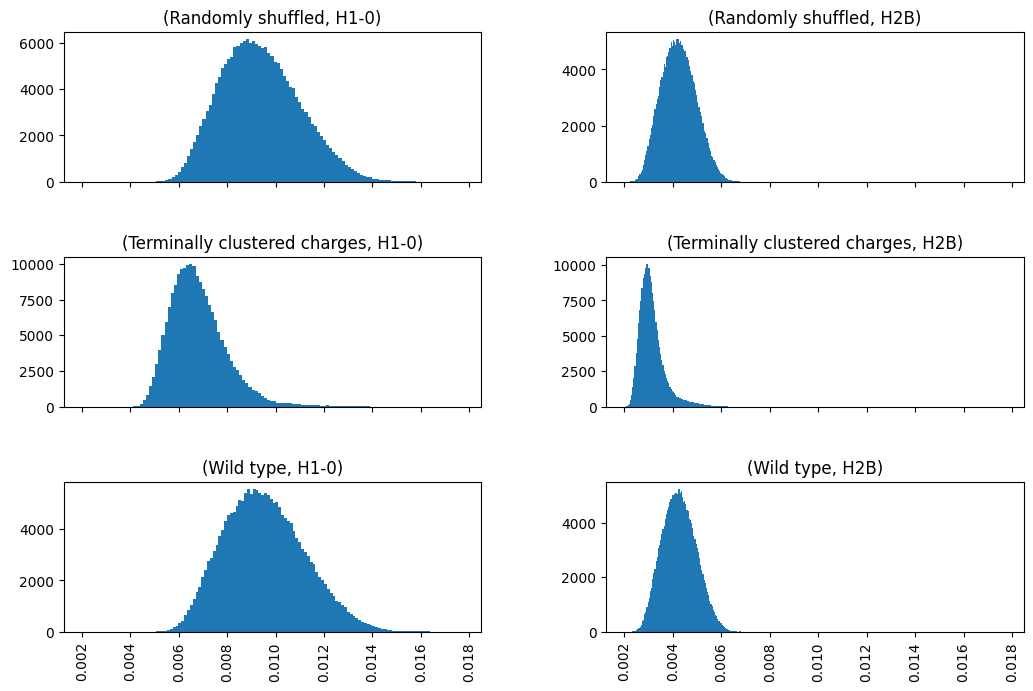

In [68]:
# Plotting Rg distributions
data = data.explode('Rg')
data['Rg'] = data['Rg'].astype(float)

# Plotting distributions
data.hist(column='Rg', by=['variant', 'template'], layout=(3,2), sharex=True, figsize=(12,8), bins=100)

# Calculating means
print("MEAN VALUES OF Rg")
print(data.groupby(by=['template', 'variant'])['Rg'].mean())